In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score 
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("data_student.csv")
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5    UNS    258 non-null    object 
dtypes: float64(5), object(1)
memory usage: 12.2+ KB


In [4]:
df.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS'], dtype='object')

In [5]:
df[" UNS"].value_counts(normalize=True)

 UNS
Middle      0.341085
Low         0.321705
High        0.244186
very_low    0.093023
Name: proportion, dtype: float64

In [6]:
df.isnull().sum()

STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
dtype: int64

In [7]:
df.drop(columns=[" UNS"],inplace=True)

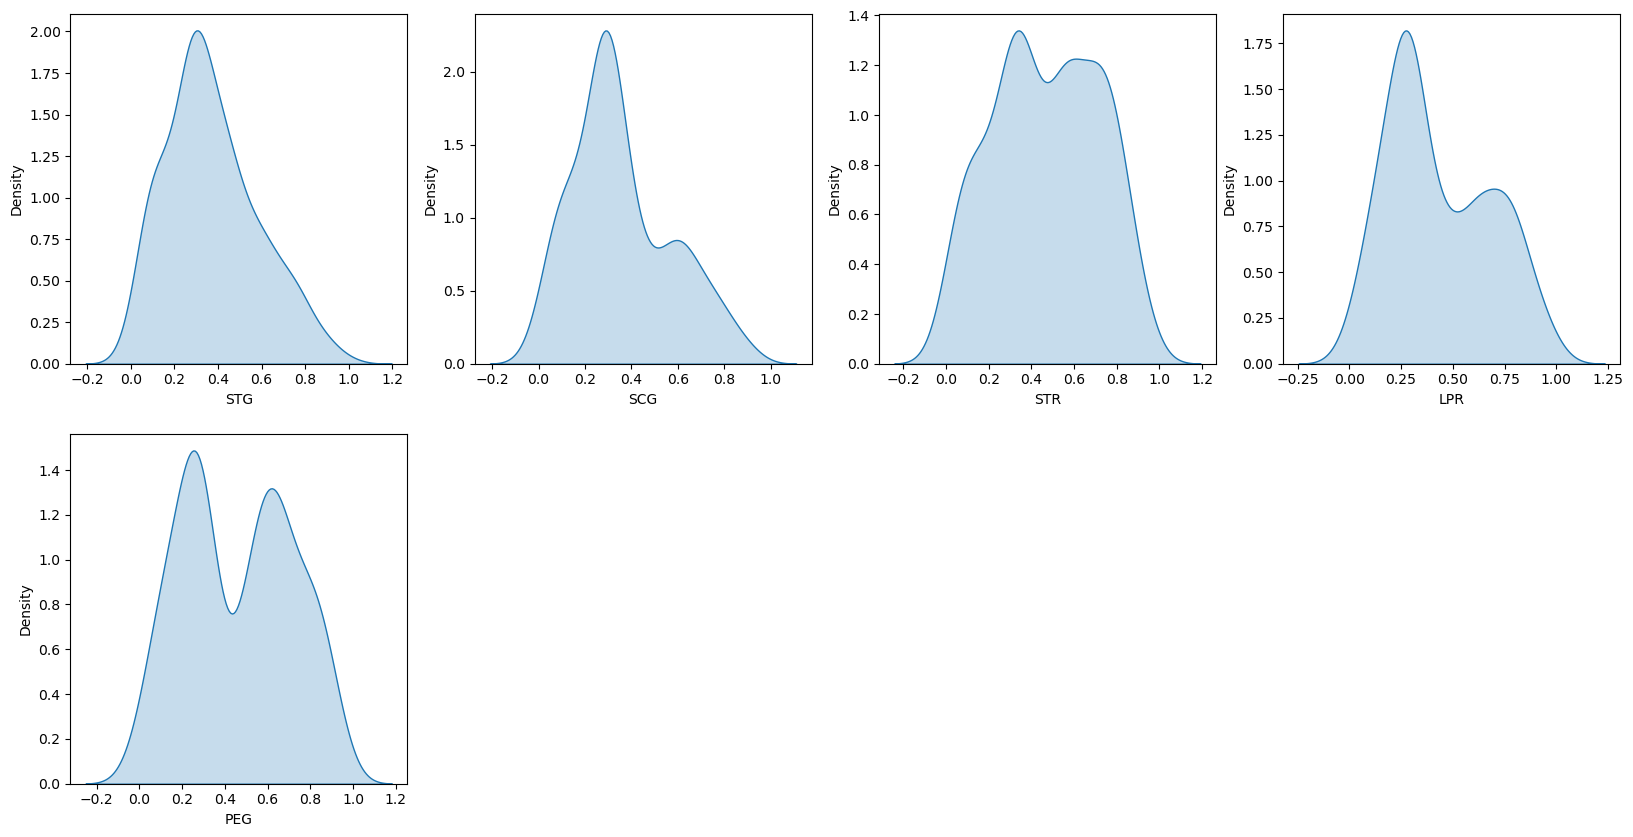

In [8]:
plt.figure(figsize=(20, 10))
for i,col in enumerate(df.columns,1):
    plt.subplot(2,4,i)
    sns.kdeplot(df[col],fill=True)
plt.show()

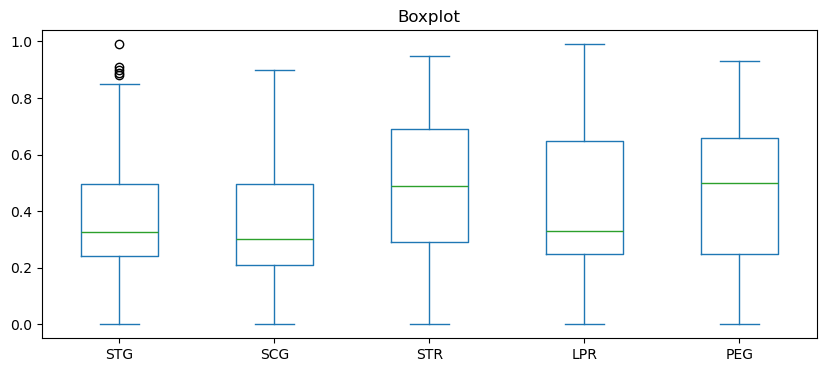

In [9]:
df.plot(kind="box", figsize=(10,4))
plt.title("Boxplot")
plt.show()

In [10]:
scaler=StandardScaler()
x=scaler.fit_transform(df)

In [11]:
'''Q1 = np.percentile(x[:, 0], 25)
Q3 = np.percentile(x[:, 0], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

x = x[(x[:, 0] > lower_bound) & (x[:, 0] < upper_bound)]
'''

'Q1 = np.percentile(x[:, 0], 25)\nQ3 = np.percentile(x[:, 0], 75)\nIQR = Q3 - Q1\n\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\nx = x[(x[:, 0] > lower_bound) & (x[:, 0] < upper_bound)]\n'

c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

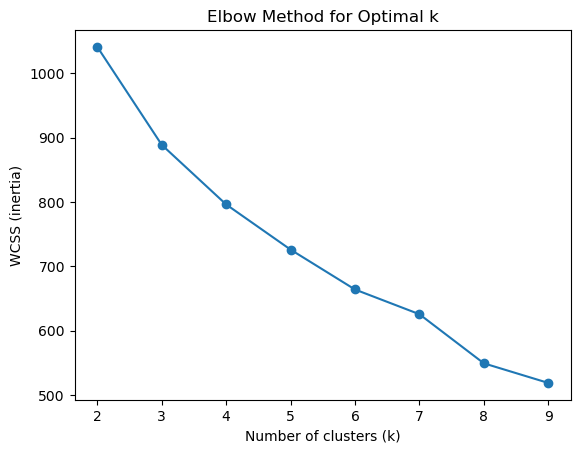

In [12]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [27]:
kmeans=KMeans(n_clusters=3,random_state=42)
res=[]
y_cluster=kmeans.fit_predict(x)
kmeanssilhouette = silhouette_score(x, y_cluster)
kmeansdb_index = davies_bouldin_score(x, y_cluster)
kmeans_ch = calinski_harabasz_score(x, y_cluster)
res.append([kmeanssilhouette,kmeansdb_index,kmeans_ch,kmeans.inertia_])
print("Silhouette Score:", kmeanssilhouette)
print("Davies-Bouldin Index:", kmeansdb_index)
print("calinski_harabasz_score:",kmeans_ch)


Silhouette Score: 0.19179769465343507
Davies-Bouldin Index: 1.74801845219125
calinski_harabasz_score: 57.57629955365016


c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



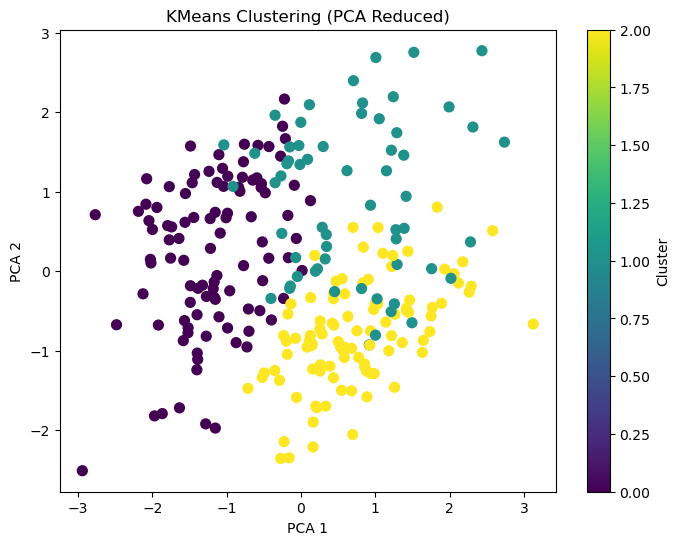

In [14]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],c=y_cluster, cmap="viridis", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clustering (PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()


In [15]:
import plotly.express as px
import pandas as pd
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])
df_pca["Cluster"] = y_cluster
fig = px.scatter_3d(
    df_pca,
    x="PCA1", y="PCA2", z="PCA3",
    color="Cluster", 
    title="3D Cluster Plot (Interactive with Plotly)",
)
fig.show()


<Figure size 800x500 with 0 Axes>

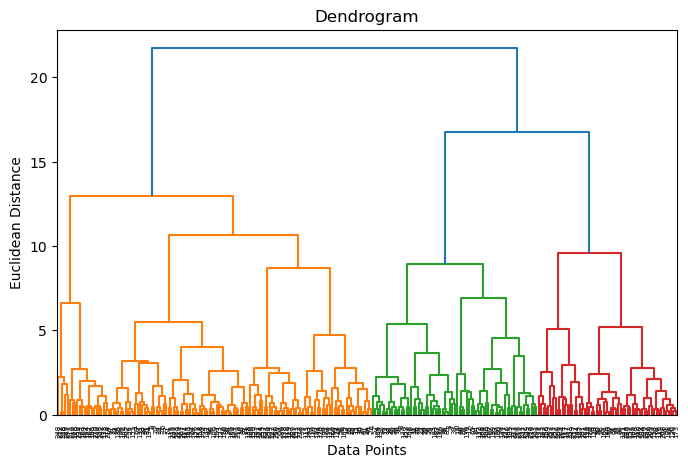

In [16]:

plt.figure(figsize=(8, 5))
dendrogram =plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show() 

Silhouette Score: 0.17326057928118008
Davies-Bouldin Index: 1.6277892207542874
calinski_harabasz_score: 53.154667311948764


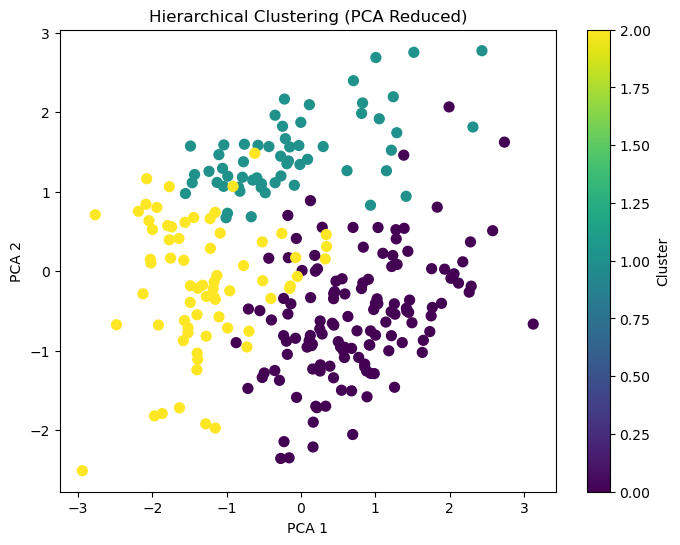

In [28]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(X_pca)
hcsilhouette = silhouette_score(x, y_hc)
hcdb_index = davies_bouldin_score(x, y_hc)
hc_ch = calinski_harabasz_score(x, y_hc)
res.append([hcsilhouette,hcdb_index,hc_ch,np.nan])
print("Silhouette Score:", hcsilhouette)
print("Davies-Bouldin Index:", hcdb_index)
print("calinski_harabasz_score:",hc_ch)
# PCA 2D plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_hc, cmap="viridis", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Hierarchical Clustering (PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()


In [18]:
import plotly.express as px
import pandas as pd
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])
df_pca["Cluster"] = y_hc
fig = px.scatter_3d(
    df_pca,
    x="PCA1", y="PCA2", z="PCA3",
    color="Cluster", 
    title="3D Cluster Plot (Interactive with Plotly)",
)
fig.show()


Silhouette Score: 0.08099791243349122
Davies-Bouldin Index: 3.0012372588979743
calinski_harabasz_score: 6.171358944883495


C:\Users\ganesh\AppData\Local\Temp\ipykernel_2488\1995732499.py:15: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



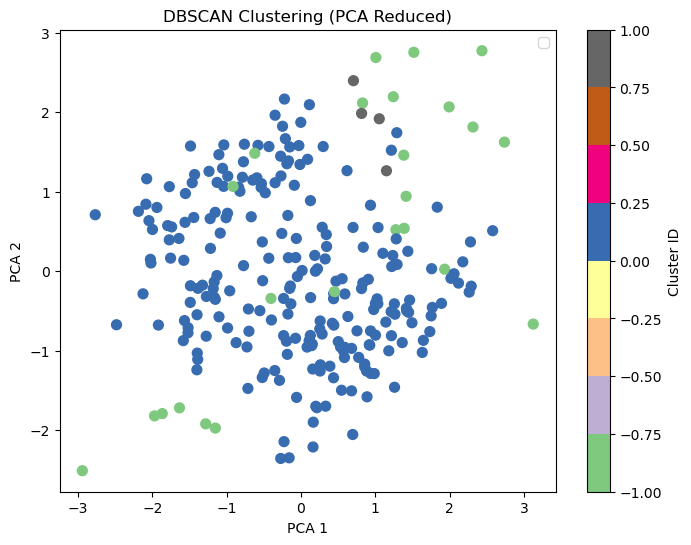

In [29]:
dbscan = DBSCAN(eps=0.7, min_samples=3)
y_db = dbscan.fit_predict(X_pca)
silhouette = silhouette_score(x, y_db)
db_index = davies_bouldin_score(x, y_db)
db_ch = calinski_harabasz_score(x, y_db)
res.append([silhouette,db_index,db_ch,np.nan])
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", db_index)
print("calinski_harabasz_score:",db_ch)
# PCA 2D plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_db, cmap="Accent", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.title("DBSCAN Clustering (PCA Reduced)")
plt.colorbar(label="Cluster ID")
plt.show()


In [31]:
dfs=pd.DataFrame(res,columns=["silhouette score","davis_bouldin_score","calinski_harabasz_score","inertia"],index=["Kmean","hierechical","DBscan"])
dfs

,silhouette score,davis_bouldin_score,calinski_harabasz_score,inertia
Kmean,0.191798,1.748018,57.576300,888.687533
hierechical,0.173261,1.627789,53.154667,NaN
DBscan,0.080998,3.001237,6.171359,NaN


In [21]:
import joblib

# Save your trained models and scaler
joblib.dump(kmeans, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']